In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 1.Loading and Preprocessing
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

In [37]:
# Drop the species column (target) since this is a clustering problem
df = pd.DataFrame(X, columns=feature_names)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# 2. Clustering Algorithm Implementation

# A) KMeans Clustering
print("KMeans Clustering")
print("----------------")
print("KMeans clustering is a partitioning method that divides the dataset into K clusters.")
print("It works by iteratively assigning data points to the nearest cluster centroid and")
print("then updating the centroids based on the mean of the assigned points.")
print("\nKMeans is suitable for the Iris dataset because:")
print("1. It assumes spherical clusters, which often applies to flower measurements.")
print("2. It works well with numerical data, which is the case for the Iris features.")
print("3. It's efficient for medium-sized datasets like Iris.")

KMeans Clustering
----------------
KMeans clustering is a partitioning method that divides the dataset into K clusters.
It works by iteratively assigning data points to the nearest cluster centroid and
then updating the centroids based on the mean of the assigned points.

KMeans is suitable for the Iris dataset because:
1. It assumes spherical clusters, which often applies to flower measurements.
2. It works well with numerical data, which is the case for the Iris features.
3. It's efficient for medium-sized datasets like Iris.


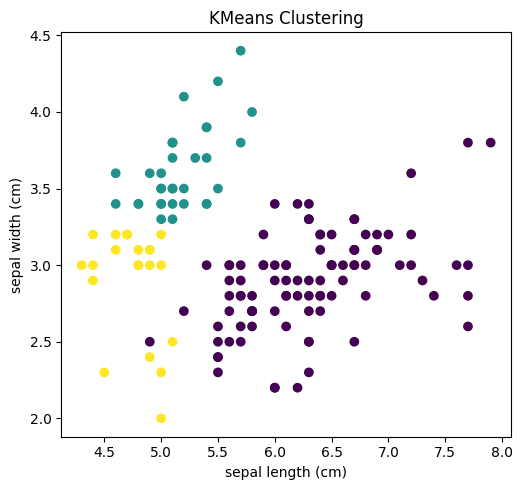

In [39]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize KMeans clusters
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()

In [40]:
# B) Hierarchical Clustering
print("\nHierarchical Clustering")
print("-----------------------")
print("Hierarchical clustering creates a tree-like hierarchy of clusters.")
print("It can be agglomerative (bottom-up) or divisive (top-down). Here I use agglomerative.")
print("It starts with each point as a cluster and merges the closest clusters iteratively.")
print("\nHierarchical clustering is suitable for the Iris dataset because:")
print("1. It doesn't assume a specific number of clusters upfront.")
print("2. It can reveal the hierarchical structure in the data, which might be meaningful for species.")
print("3. It works well with small to medium-sized datasets like Iris.")


Hierarchical Clustering
-----------------------
Hierarchical clustering creates a tree-like hierarchy of clusters.
It can be agglomerative (bottom-up) or divisive (top-down). We'll use agglomerative.
It starts with each point as a cluster and merges the closest clusters iteratively.

Hierarchical clustering is suitable for the Iris dataset because:
1. It doesn't assume a specific number of clusters upfront.
2. It can reveal the hierarchical structure in the data, which might be meaningful for species.
3. It works well with small to medium-sized datasets like Iris.


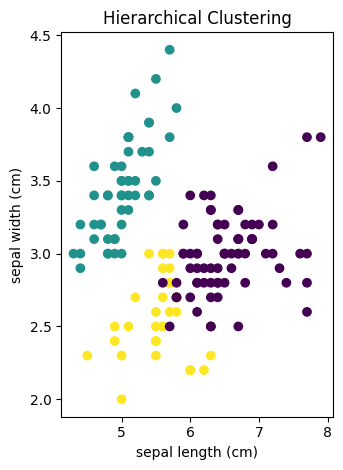

In [41]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Visualize Hierarchical clusters
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()

In [42]:
# Compare clustering results
print("\nClustering Results Comparison:")
print(f"KMeans Clusters: {np.unique(kmeans_labels)}")
print(f"Hierarchical Clusters: {np.unique(hierarchical_labels)}")


Clustering Results Comparison:
KMeans Clusters: [0 1 2]
Hierarchical Clusters: [0 1 2]


In [43]:
# Calculate and print silhouette scores
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)

print(f"\nKMeans Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.4f}")

print("Higher silhouette scores indicate better-defined clusters.")
print("The clustering algorithm with the higher score may be more suitable for this dataset,so the better clustering algorithm for the dataset is")
if(kmeans_silhouette>hierarchical_silhouette):
    print("KMeans Clustering")
else:
    print("Hierarchical Clustering")


KMeans Silhouette Score: 0.4799
Hierarchical Silhouette Score: 0.4467
Higher silhouette scores indicate better-defined clusters.
The clustering algorithm with the higher score may be more suitable for this dataset,so the better clustering algorithm for the dataset is
KMeans Clustering
